In [35]:
import pandas as pd
import numpy as np
import time
import datetime
import dateutil.parser 

In [2]:
pd.read_csv("f20.txt")

,NAME TYPE TARGET HTTP_STATUS STATUS TIMESTAMP
0,operation-1550515303308-5822f79df5b38-47ee07e5...
1,operation-1550584279470-5823f892c1047-dc898c58...
2,operation-1550584319014-5823f8b8775db-02b11454...
3,operation-1550584319015-5823f8b877880-0f4fa9f9...
4,operation-1550591088537-582411f063050-a56dab24...
5,operation-1550614643706-582469b058979-6c6cb754...
6,operation-1550614648723-582469b5219bc-9d63e987...
7,operation-1550614719322-582469f8758c9-489cadb4...
8,operation-1550614804007-58246a4938b20-29dd31a1...
9,operation-1550518941803-5823052be65dc-007c9ad5...


In [3]:
import json

In [8]:
fc=open("f20.json")

In [9]:
jdata = json.load(fc)

In [10]:
jdata

[{'endTime': '2019-02-18T10:44:32.429-08:00',
  'id': '2290850289894769287',
  'insertTime': '2019-02-18T10:41:44.042-08:00',
  'kind': 'compute#operation',
  'name': 'operation-1550515303308-5822f79df5b38-47ee07e5-23c8e89e',
  'operationType': 'insert',
  'progress': 100,
  'selfLink': 'https://www.googleapis.com/compute/v1/projects/first-220321/global/operations/operation-1550515303308-5822f79df5b38-47ee07e5-23c8e89e',
  'startTime': '2019-02-18T10:41:45.314-08:00',
  'status': 'DONE',
  'targetId': '863184499071468168',
  'targetLink': 'https://www.googleapis.com/compute/v1/projects/first-220321/global/images/mp1',
  'user': 'prateek3.14@gmail.com'},
 {'endTime': '2019-02-19T05:51:49.388-08:00',
  'id': '9214788405173532471',
  'insertTime': '2019-02-19T05:51:20.128-08:00',
  'kind': 'compute#operation',
  'name': 'operation-1550584279470-5823f892c1047-dc898c58-819cf03f',
  'operationType': 'insert',
  'progress': 100,
  'selfLink': 'https://www.googleapis.com/compute/v1/projects/fi

In [72]:
out = dict()
for entry in jdata:
    eid = entry['id']
    iname = entry['targetLink']
    if entry['operationType']=='insert':
        out[iname] = (entry, np.nan)
    if entry['operationType']=='compute.instances.preempted':
        orig_entry = out[iname][0]
        start_time = orig_entry['insertTime']
        end_time = entry['insertTime']
        ttl = ttl_in_minutes(start_time, end_time)
        out[iname] = (orig_entry, ttl)

In [73]:
def ttl_in_minutes(start_time, end_time):
    s=dateutil.parser.parse(start_time)
    e=dateutil.parser.parse(end_time)
    diff = e-s
    return diff.total_seconds()

In [74]:
string_time='2019-02-19T11:43:16.099-08:00'

In [79]:
for e in list(out):
    #print(out[e][1])
    if np.isnan(out[e][1]):
        print("deleting")
        out.pop(e) 

deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting


In [80]:
out

{'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/instances/aardvark27': ({'endTime': '2019-02-18T11:42:52.506-08:00',
   'id': '9133208911590372464',
   'insertTime': '2019-02-18T11:42:23.437-08:00',
   'kind': 'compute#operation',
   'name': 'operation-1550518941803-5823052be65dc-007c9ad5-db373ff0',
   'operationType': 'insert',
   'progress': 100,
   'selfLink': 'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/operations/operation-1550518941803-5823052be65dc-007c9ad5-db373ff0',
   'startTime': '2019-02-18T11:42:26.186-08:00',
   'status': 'DONE',
   'targetId': '7290062617505608817',
   'targetLink': 'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/instances/aardvark27',
   'user': 'prateeks@first-220321.iam.gserviceaccount.com',
   'zone': 'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a'},
  86460.7),
 'https://www.googleapis.com/compute/v1/projec

In [81]:
s=list(zip(*(out.values())))[1]

In [82]:
import matplotlib.pyplot as plt

In [83]:
np.nancumsum(s)

array([  86460.7  ,   88824.182,  175263.831,  264218.822,  353168.379,
        354414.14 ,  443343.003,  448153.817,  470457.359,  472849.397,
        477498.098,  554264.785,  560828.229,  599717.816,  688180.21 ,
        776637.148,  777532.974,  777934.192,  864422.339,  950902.353,
       1037376.542, 1123844.146, 1210306.371])

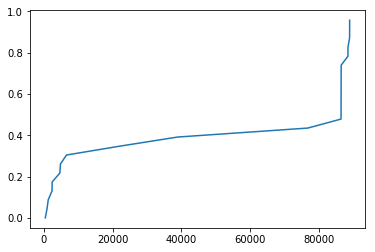

In [84]:
plt.plot(np.sort(s), np.linspace(0,1,len(s), endpoint=False))

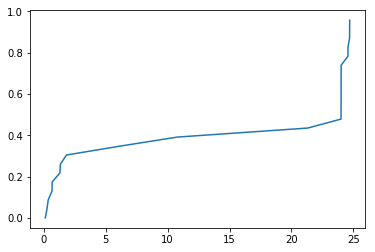

In [85]:
h=np.array(s)/3600.0
plt.plot(np.sort(h), np.linspace(0,1,len(h), endpoint=False))

In [37]:
dt=dateutil.parser.parse(string_time)

In [38]:
datetime.timedelta(dt, dt)

TypeError: unsupported type for timedelta seconds component: datetime.datetime

In [40]:
d=dt-dt

In [41]:
d.total_second

0.0